In [2]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.10.7 (tags/v3.10.7:6cc6b13, Sep  5 2022, 14:08:36) [MSC v.1933 64 bit (AMD64)]
scipy: 1.9.1
numpy: 1.23.3
matplotlib: 3.6.0
pandas: 1.5.0
sklearn: 1.1.2


In [30]:
# Load libraries
import seaborn
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# fix this....
# from sklearn import cross_validation
from sklearn.model_selection import train_test_split

# other fixes
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score



from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [11]:
dataset = pandas.read_csv("./input/iris.csv")


In [12]:
print(dataset.head(5))

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


In [13]:
print(dataset.describe())


       sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [14]:
#Remove a column from the data
dataset = dataset.drop('Id',axis=1)

KeyError: "['Id'] not found in axis"

In [15]:
print(dataset.head(5))


   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


In [16]:
print(dataset.describe())

       sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


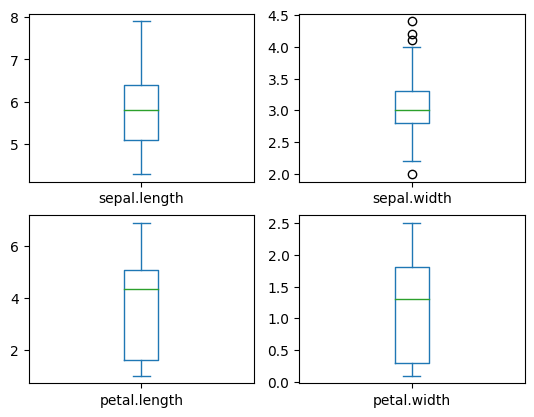

In [17]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

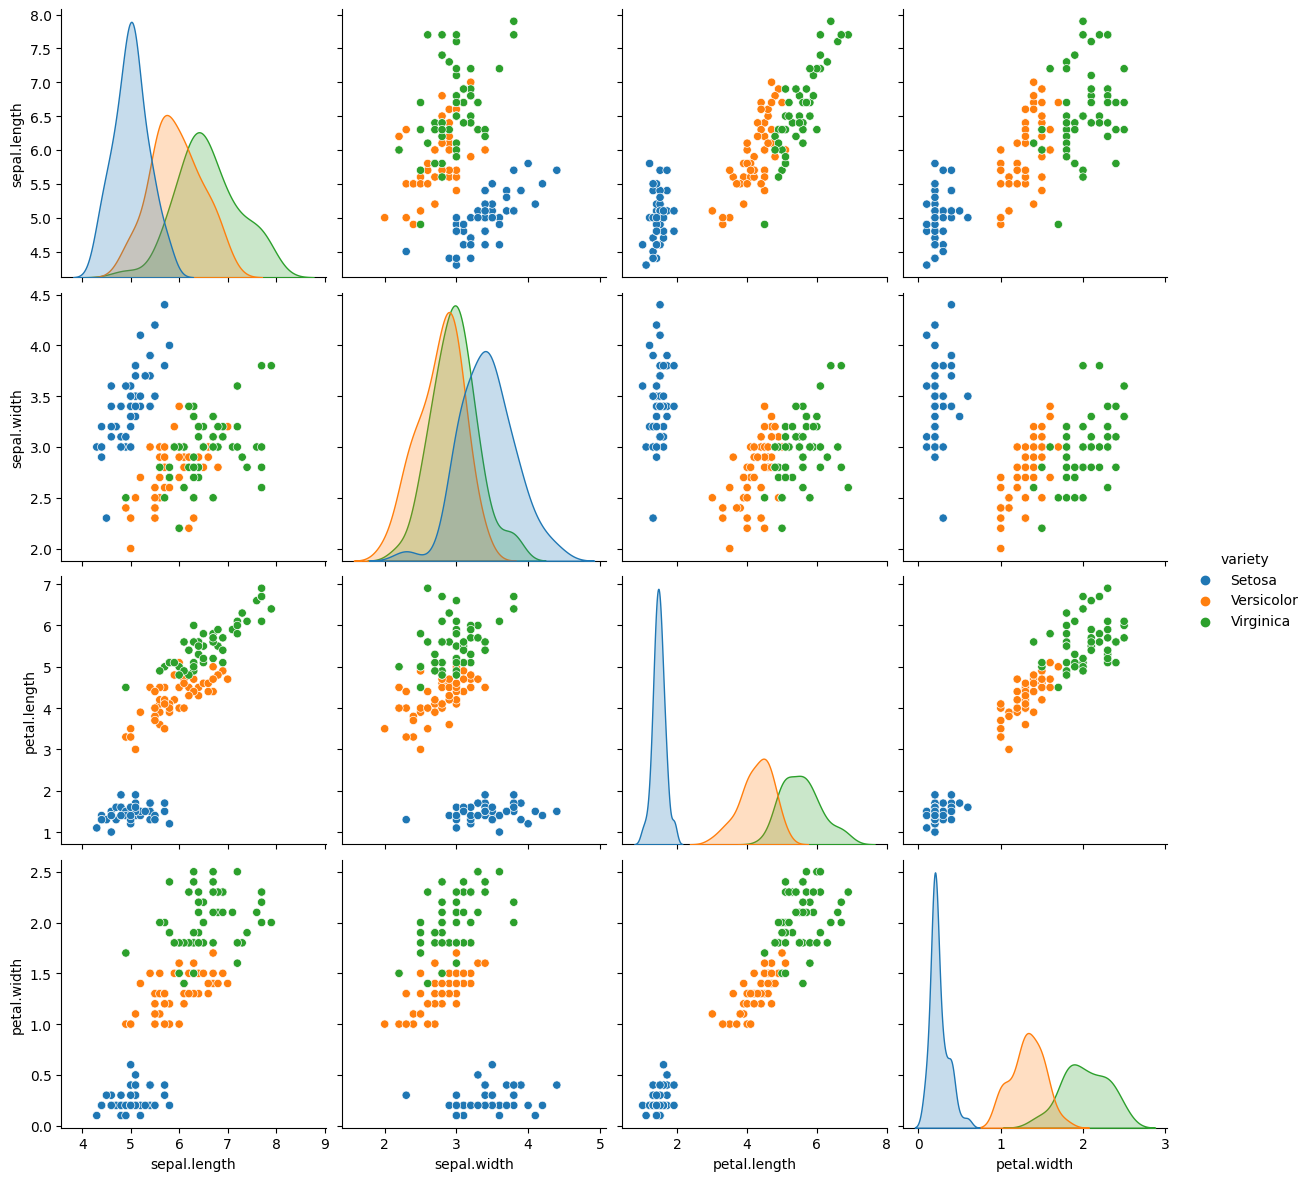

In [20]:
seaborn.pairplot(dataset, hue="variety", height=3, diag_kind="kde")
plt.show()

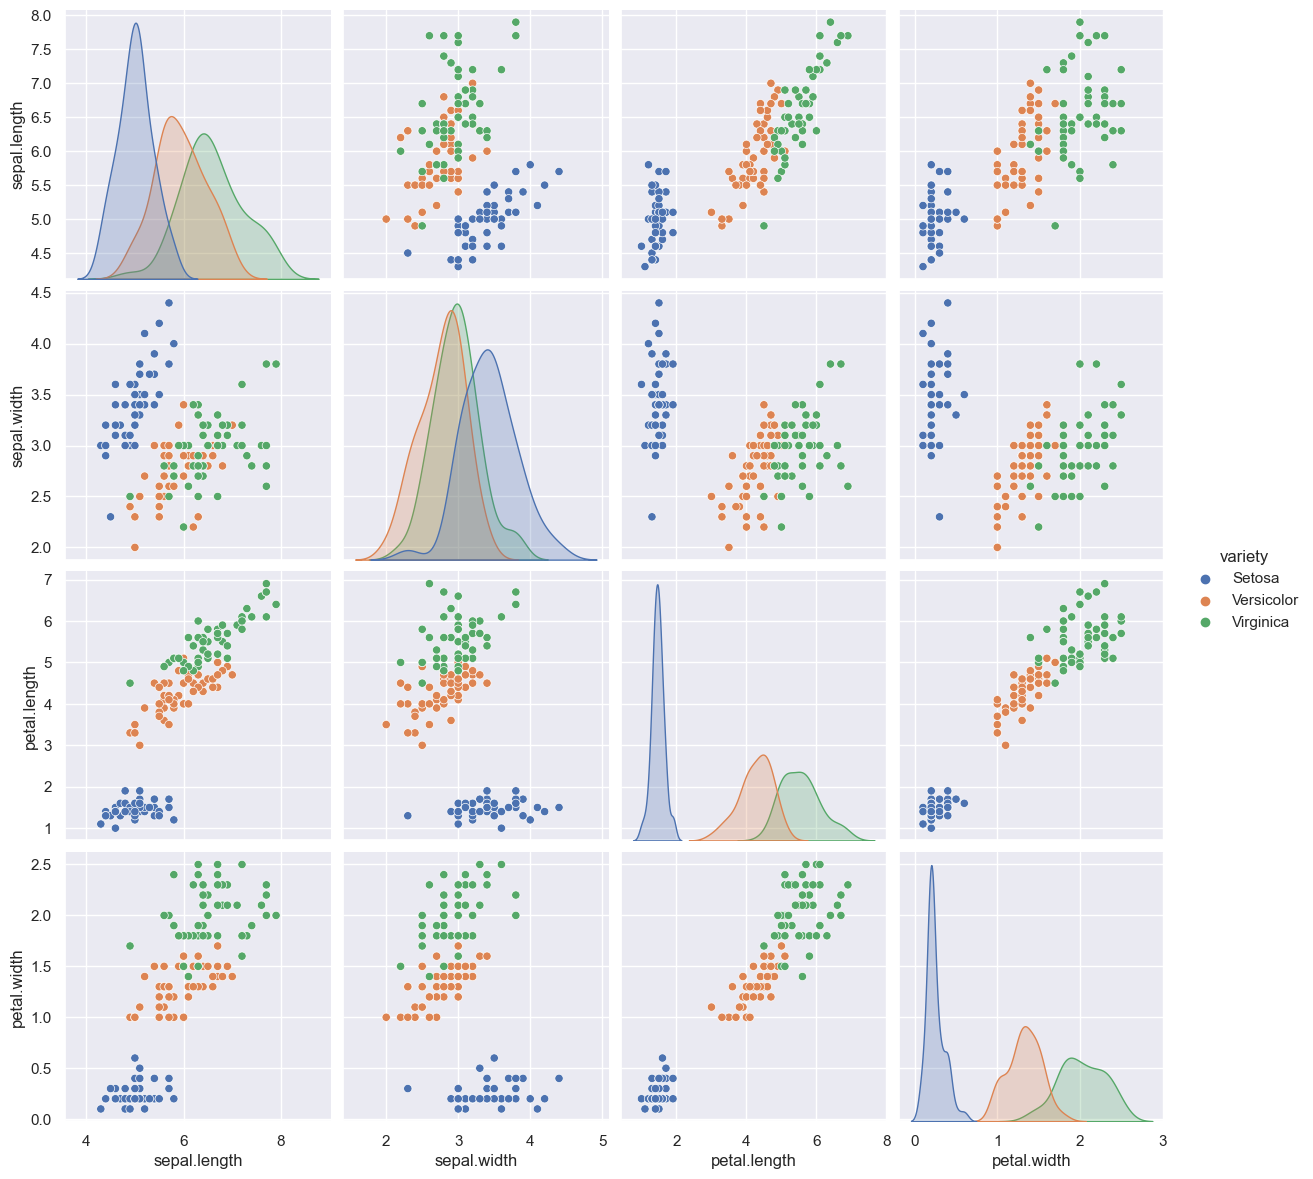

In [22]:
seaborn.pairplot(dataset, hue="variety", height = 3)
seaborn.set()

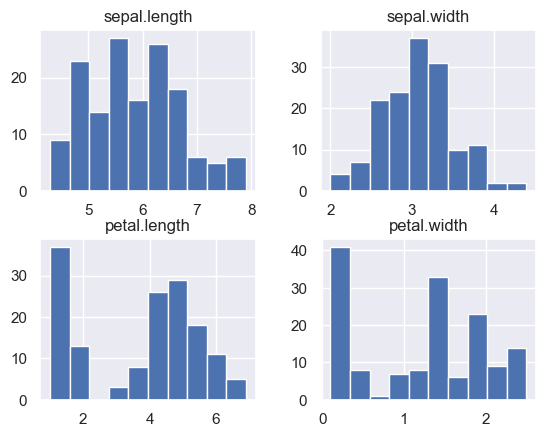

In [23]:
dataset.hist()
plt.show()

In [24]:
#I made an adaptation of this reference online 
#----> http://machinelearningmastery.com/machine-learning-in-python-step-by-step/
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, 
random_state=seed)

In [25]:
# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'

In [35]:
#I made an adaptation of this reference online 
#----> http://machinelearningmastery.com/machine-learning-in-python-step-by-step/
#Here we are testing various predictive algorithms from scikit-learn
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(
		# n=num_instances, 
		n_splits=num_folds, 
		# random_state=seed
		)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.983333 (0.033333)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.983333 (0.033333)


C:\Users\Josh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


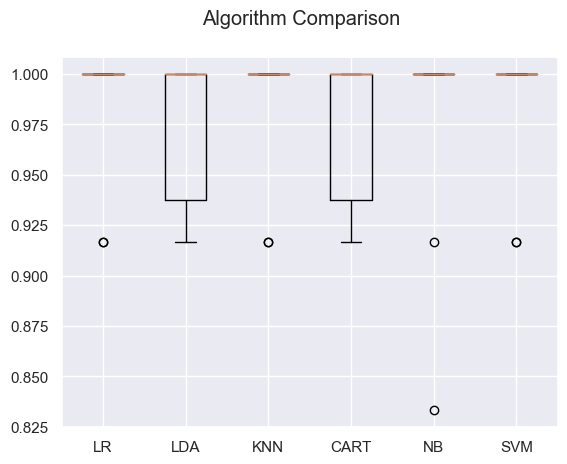

In [36]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [37]:
# Make predictions on validation dataset
svn = SVC()
svn.fit(X_train, Y_train)
predictions = svn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8666666666666667
[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         7
  Versicolor       0.83      0.83      0.83        12
   Virginica       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.88        30
weighted avg       0.87      0.87      0.87        30



In [38]:
#Input Vector 
X_new = numpy.array([[3, 2, 4, 0.2], [  4.7, 3, 1.3, 0.2 ]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (2, 4)


In [42]:
prediction = svn.predict(X_new)

In [44]:
#Prediction of the species from the input vector
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Versicolor' 'Setosa']
